# Double pendulum object tracking

*Nathan Keim, April 2019*

This notebook shows how to find features in the full movie of the double pendulum with colored markers.

The image analysis was developed, and the analysis is carried out, in a separate notebook.

You'll need working versions of `ffmpeg`, PyAV (`av`), and `moviepy` installed, in addition to `pims`.

In [1]:
import pims, skimage
import skimage.morphology
from matplotlib import pyplot as pl
import pandas as pd

Movie taken with an iPhone SE and saved in H.264 format.

In [2]:
all_frames = pims.open('dbl_pend_240fps.mov')

/Users/nkeim/anaconda/envs/trackpy-examples/lib/python3.7/site-packages/pims/api.py:207: UserWarning: <class 'pims.pyav_reader.PyAVReaderTimed'> errored: [Errno 2] No such file or directory: 'dbl_pend_240fps.mov'
  warn(message)
/Users/nkeim/anaconda/envs/trackpy-examples/lib/python3.7/site-packages/pims/api.py:207: UserWarning: <class 'pims.pyav_reader.PyAVReaderIndexed'> errored: [Errno 2] No such file or directory: 'dbl_pend_240fps.mov'
  warn(message)
/Users/nkeim/anaconda/envs/trackpy-examples/lib/python3.7/site-packages/pims/api.py:207: UserWarning: <class 'pims.imageio_reader.ImageIOReader'> errored: The ImageIOReader requires imageio and (for imageio >= 2.5) imageio-ffmpeg to work.
  warn(message)
/Users/nkeim/anaconda/envs/trackpy-examples/lib/python3.7/site-packages/pims/api.py:207: UserWarning: <class 'pims.moviepy_reader.MoviePyReader'> errored: The MoviePyReader requires moviepy to work.
  warn(message)


UnknownFormatError: All handlers returned exceptions:
<class 'pims.pyav_reader.PyAVReaderTimed'> errored: [Errno 2] No such file or directory: 'dbl_pend_240fps.mov'
<class 'pims.pyav_reader.PyAVReaderIndexed'> errored: [Errno 2] No such file or directory: 'dbl_pend_240fps.mov'
<class 'pims.imageio_reader.ImageIOReader'> errored: The ImageIOReader requires imageio and (for imageio >= 2.5) imageio-ffmpeg to work.
<class 'pims.moviepy_reader.MoviePyReader'> errored: The MoviePyReader requires moviepy to work.


In [3]:
len(all_frames)

NameError: name 'all_frames' is not defined

Frame([[[183, 167, 154],
        [183, 167, 154],
        [183, 167, 154],
        ...,
        [252, 230, 224],
        [252, 230, 224],
        [252, 230, 224]],

       [[183, 167, 154],
        [183, 167, 154],
        [183, 167, 154],
        ...,
        [252, 230, 224],
        [252, 230, 224],
        [252, 230, 224]],

       [[183, 167, 154],
        [183, 167, 154],
        [183, 167, 154],
        ...,
        [252, 230, 224],
        [252, 230, 224],
        [252, 230, 224]],

       ...,

       [[137, 106,  98],
        [138, 107,  99],
        [137, 106,  98],
        ...,
        [187, 160, 155],
        [184, 160, 154],
        [184, 160, 154]],

       [[137, 106,  98],
        [138, 107,  99],
        [138, 107,  99],
        ...,
        [187, 163, 157],
        [183, 161, 155],
        [183, 161, 155]],

       [[137, 106,  98],
        [138, 107,  99],
        [138, 107,  99],
        ...,
        [188, 164, 158],
        [185, 163, 157],
        [185, 163, 157]]], dtype=uint8)
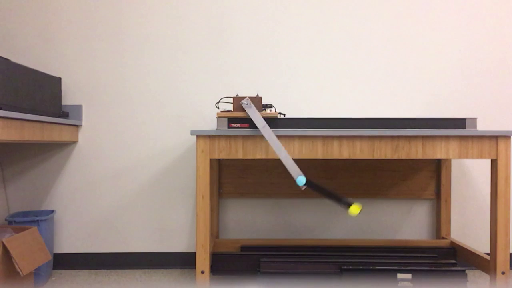

In [4]:
frames = all_frames[::2]
im = frames[50]
im

In [ ]:
def find_spot(im_binary):
    im_cleaned = skimage.morphology.remove_small_objects(im_binary, 50)
    im_label = skimage.measure.label(im_cleaned)
    regions = skimage.measure.regionprops(im_label)
    y, x = regions[0].centroid
    return x, y

In [13]:
pos_knee_list, pos_foot_list = [], []

# This takes about 20 minutes on a MacBook Pro
for im in frames:
    hsv = skimage.color.rgb2hsv(im)
    im_knee = (hsv[:,:,1] >= 0.2) & (hsv[:,:,0] > 0.4) & (hsv[:,:,0] < 0.6)
    im_foot = (hsv[:,:,1] >= 0.6) & (hsv[:,:,0] > 0.1) & (hsv[:,:,0] < 0.3)
    pos_knee_list.append(find_spot(im_knee))
    pos_foot_list.append(find_spot(im_foot))
    

/Users/nkeim/anaconda/envs/new3/lib/python3.7/site-packages/skimage/color/colorconv.py:269: RuntimeWarning: divide by zero encountered in true_divide
  out_s = delta / out_v


In [14]:
coords = pd.DataFrame({'xfoot': [pos[0] for pos in pos_foot_list],
                       'yfoot': [pos[1] for pos in pos_foot_list],
                       'xknee': [pos[0] for pos in pos_knee_list],
                       'yknee': [pos[1] for pos in pos_knee_list],})

coords.to_csv('dbl_pend_120fps_coords.csv')